In [34]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
import numpy as np

In [35]:
data = load_breast_cancer()
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [36]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [44]:
from sklearn.linear_model import LogisticRegression as LR
LR_ = LR( solver = "liblinear", C = 0.5,random_state = 420)
cross_val_score(LR_,data.data,data.target,cv = 10).mean()

0.9491454930429521

In [49]:
X_embedded = SelectFromModel(LR_,norm_order = 1).fit_transform(data.data,data.target)
X_embedded.shape

(569, 8)

0.0 30
0.08502275472941369 19
0.17004550945882738 13
0.2550682641882411 10
0.34009101891765475 8
0.4251137736470684 7
0.5101365283764822 5
0.5951592831058958 5
0.6801820378353095 5
0.7652047925647232 5
0.8502275472941369 5
0.9352503020235505 3
1.0202730567529643 3
1.1052958114823779 3
1.1903185662117917 2
1.2753413209412052 1
1.360364075670619 1
1.4453868304000328 1
1.5304095851294464 1
1.6154323398588601 1


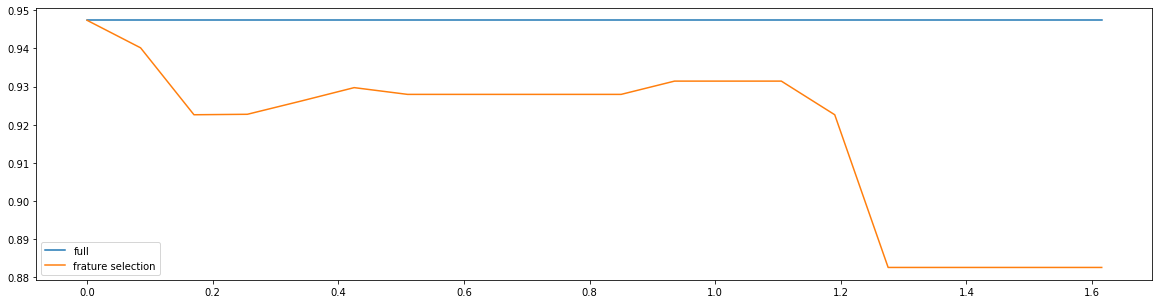

In [61]:
import matplotlib.pyplot as plt
fullx=[]
fsx=[]

threshold = np.linspace(0,abs(LR_.fit(data.data,data.target).coef_).max(),20)
k=0
for i in threshold:
    X_embedded = SelectFromModel(LR_,threshold=i).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=5).mean())
    print((threshold)[k],X_embedded.shape[1])
    k+=1

plt.figure(figsize = (20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="frature selection")
plt.legend()
plt.show()               
               
    

#### 但这种方法其实是比较无效的，因为当threshold越大数，被删除的特征越多，模型的效果也越来越差，此时模型最好的情况下需要保证有17个以上的特征，但其实和25个并没有多大区别不是吗？
#### 此时可用第二种调整方法，条逻辑回归的类LR_,通过话c的学习曲线来实现

0.8897653616800622 2.01


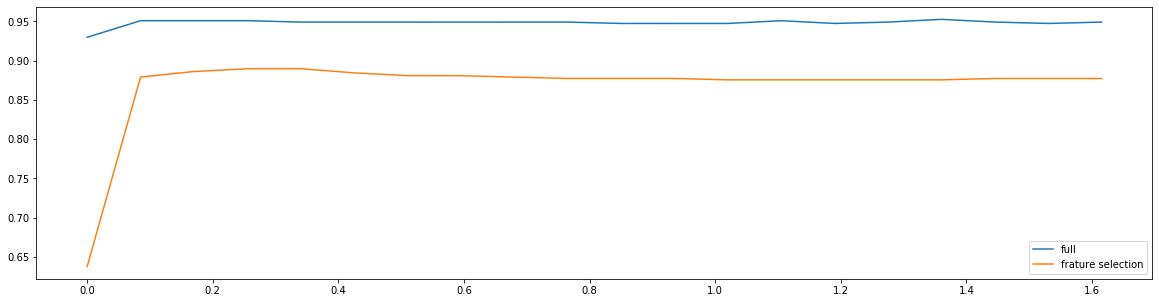

In [67]:
import matplotlib.pyplot as plt
import numpy as np
fullx=[]
fsx=[]

C= np.arange(0.01,10.01,0.5)

for i in C:
    LR_ = LR( solver = "liblinear", C = i,random_state = 420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    

plt.figure(figsize = (20,5))
plt.plot(threshold,fullx,label="full")
plt.plot(threshold,fsx,label="frature selection")
plt.legend()
plt.show()    
